In [1]:
import numpy, math
from matplotlib import pyplot as plt
from matplotlib import patches
from src import code_toggle
%matplotlib inline

# Warm-up exercises

\begin{align*}
&1. \quad y = e^{6x^4} &\quad y' &=\\
&2. \quad f(x,y) = x^2y^3 + xy &\quad f_x &=\\
&3. \quad f(x,y) = x^2y^3 + xy &\quad f_y &=\\
&4. \quad f(x,y) = e^x\sin(xy) &\quad f_x &= \\
&5. \quad f(x,y) = e^x\sin(xy) &\quad f_y &=\\
&6. \quad  \frac{9^0}{100000} & &=\\
&7. \quad  e\ln 1 &\quad &=\\
&8. \quad  \ln e^e  &\quad &=\\
&9. \quad  \frac{10^{-19} \times 10^{11}}{10^{14} \times 10^{-22}} & &=\\
\end{align*}

10. What is the pH of a 0.1 M solution of HCl (which contains 3.65g HCl)?
11. If you have 1ml of this solution how can its pH be *increased* by 1 unit?


# Integration

## How can we calculate the area under a curve?

Consider the graph of 

$$y=x^2$$

Suppose we want to find the area under the curve from $x=1$ to $x=2$.

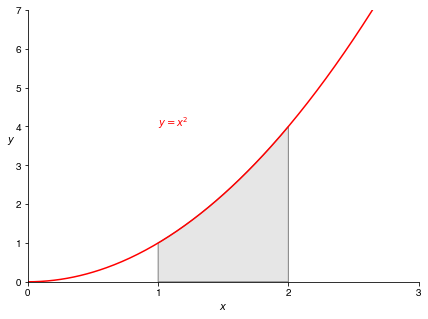

In [2]:
from matplotlib.patches import Polygon

x = numpy.linspace(0, 3, 300)

# plt.xkcd()
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(7,5))

axis.set_xlim([0,3])
axis.set_xticks(numpy.arange(0,4))
axis.set_xlabel('$x$')
axis.set_ylim([0,7])
axis.set_ylabel('$y$',rotation=0)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

def func(x):
    return(x**2)

a=1
b=2
ix=numpy.linspace(a,b)
iy=func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
axis.add_patch(poly)

y = x**2
axis.annotate('$y=x^2$',xy=(1,4),c='r')
axis.plot(x, y,'r-')
plt.show()

code_toggle()

We could divide the area into strips, calculate the area of each strip and sum these areas together

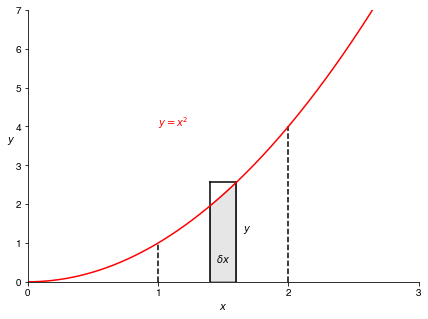

In [3]:
from matplotlib.patches import Polygon

x = numpy.linspace(0, 3, 300)

# plt.xkcd()
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(7,5))

axis.set_xlim([0,3])
axis.set_xticks(numpy.arange(0,4))
axis.set_xlabel('$x$')
axis.set_ylim([0,7])
axis.set_ylabel('$y$',rotation=0)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

def func(x):
    return(x**2)


a=1.4
b=1.6
ix=numpy.linspace(a,b)
iy=func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
axis.add_patch(poly)

axis.plot((1,1),(0,1),'k--')
axis.plot((2,2),(0,4),'k--')

axis.plot((1.4,1.4),(0,2.56),'k-')
axis.plot((1.6,1.6),(0,2.56),'k-')
axis.plot((1.4,1.6),(2.56,2.56),'k-')
axis.annotate('$\delta x$',xy=(1.5,0.5),ha='center',color='black')
axis.annotate('$y$',xy=(1.65,1.3),ha='left',color='black')

y = x**2
axis.annotate('$y=x^2$',xy=(1,4),c='r')
axis.plot(x, y,'r-')
plt.show()

code_toggle()

The area of the small shaded strip drawn on the graph above is $\delta A$ (since it is small and finite) and 

$$ \delta A \approx y. \delta x $$

But this is clearly an overestimate (if the curve had $\frac{dy}{dx} < 0$ then it would be an underestimate)

However we can imagine splitting up the region betwen $x=1$ and $x=2$ into lots of small strips, calculating their areas and adding them up (summing them)


$$ \text{total area (A)} \approx \sum_{x=1}^{x=2} y.\delta x$$

where the capital Greek sigma ($\Sigma$) is used since it is short for 'sum'. Consider our first equation and re-arrange it to make y the subject

$$ y \approx \frac{\delta A}{\delta x} $$

Just like when we were trying to calculate the slope of a function, as we make $\delta x$ smaller and smaller, this becomes more and more accurate. If we let $\delta x$ become infinitely small then it will be exact i.e.

$$ y = \lim_{\delta x \rightarrow 0} \frac{\delta A}{\delta x} $$

Notice how we now have an equality (rather than an approximately equals sign: $\approx$)

This can be written in Leibnizian form as 

$$ y = \frac{dA}{dx} $$

where just like before the RHS is a single term (it is the differential of $A$ with respect to $x$) and CANNOT be simplified.

Hence we can write

\begin{align*}
A &= \lim_{\delta x \rightarrow 0} \sum_{x=1}^{x=2} \delta A\\
 &= \lim_{\delta x \rightarrow 0} \sum_{x=1}^{x=2}  y. \delta x\\
\end{align*}

At this point we get tired of writing the limit symbol and then the summation symbol and so invent a new one; the long s was chosen by Leibniz since this is an infinite sum. 

\begin{align*}
A &= \int_{x=1}^{x=2} dA\\
&= \int_{x=1}^{x=2} y.dx\\
\end{align*}

Over time the long s has been lost from English but lives on as part of the sharp s in German. It means "sum over"

Fine. We've got some fancy new notation. How do we DO integration? 

We said that:

\begin{align*}
A &= \int_{x_1}^{x_2} dA \\
 &= \int_{x1}^{x2} y.dx
\end{align*}

but we also showed that $y = \frac{dA}{dx}$, therefore

$$\boxed{ A = \int_{x_1}^{x_2} \frac{dA}{dx}. dx }$$

So INTEGRATION reverses the process of DIFFERENTIATION. It is the inverse mathematical operation.

### Example 1

We know that 

$$\frac{d}{dx}(x^2) = 2x $$ 

so 

$$ \left [ x^2 \right ]_{x_1}^{x_2} - \int_{x_1}^{x_2} 2x. dx $$

where the square brackets around our function mean "the area of the function (here $x^2$) between the values $x=1$ and $x=2$". The more positive number is always the top one.


### Example 2

Likewise

$$\frac{d}{dx}\left (\frac{1}{3} x^3 \right ) = x^2 $$ 
so 

\begin{align*}
\int_{x=1}^{x=2} 2x. dx &= \left [ \frac{1}{3} x^3 \right ]_{x=1}^{x=2}\\
&= \frac{8}{3} - \frac{1}{3}\\
&= \frac{7}{3} 
\end{align*}


### Integrating polynomials

Since we already know that 

$$ \frac{d}{dx} (ax^{n+1}) = a(n+1)x^n $$

where $a$ and $n$ are constants (just numbers). (I've just written it with a power of $(n+1)$ rather than $n$ as we normally do, but you can check it is correct). Then we can infer that

$$ \boxed{ \int_{x_1}^{x_2} ax^n.dx = \left [ \frac{a}{(n+1)}x^{n+1} \right ]_{x_1}^{x_2} }$$

EXCEPT when $n=-1$

### Example 3

$$ \int_{x_1}^{x_2} x^6. dx = \left [ \frac{1}{7} x^7 \right ]_{x_1}^{x_2}$$

Because integration is the INVERSE of differentiation we can ALWAYS CHECK our answer by differentiating it!

\begin{align*}
\frac{d}{dx}\left (\frac{1}{7}x^7 \right ) &= \frac{7}{7}x^6\\
&= x^6
\end{align*}

Yes, our answer is correct

### Example 4

\begin{align*} 
\int_{x_1}^{x_2} x^{3/2}. dx &= \left [ \frac{1}{5/2} x^{5/2} \right ]_{x_1}^{x_2}\\
&= \left [ \frac{2}{5} x^{5/2} \right ]_{x_1}^{x_2}
\end{align*}

Differentiating to check ...

\begin{align*}
\frac{d}{dx}\left ( \frac{2}{5} x^{5/2} \right ) &= \frac{2}{5}. \frac{5}{2}x^{3/2}\\
&= x^{3/2} 
\end{align*}

Yes, our answer is correct

### Example 5

\begin{align*} 
\int_{x_1}^{x_2} \frac{1}{\sqrt{x}}. dx &= \left [ \frac{1}{1/2} x^{1/2} \right ]_{x_1}^{x_2}\\
&= \left [ 2 x^{1/2} \right ]_{x_1}^{x_2}\\
&= \left [ 2 \sqrt{x} \right ]_{x_1}^{x_2}
\end{align*}

Differentiating to check ...

\begin{align*}
\frac{d}{dx}\left ( 2 x^{1/2} \right ) &= 2. \frac{1}{2}x^{-1/2}\\
&= x^{-1/2}\\
&= \frac{1}{\sqrt{x}}
\end{align*}

Yes, our answer is correct

<div class="alert alert-block alert-danger">
<img src="images/curtis.jpg" width=50 title="Curtis is not happy" style="vertical-align:top"/>
<b>Common misconception:</b> It is very easy to get $x_1$ and $x_2$ the wrong way round. 
</div>

$x_1$ and $x_2$ are called the LIMITS of the integration (in our motiviating example the limits were 1 and 2). Both of these are correct;

\begin{align*}
\int^b_a f'(x).dx &= \left [ f(x) \right ]^b_a\\
&= f(b)-f(a)
\end{align*}

\begin{align*}
\int^a_b f'(x).dx &= \left [ f(x) \right ]^a_b\\
&= f(a)-f(b)
\end{align*}

Notice how it is always the top limit *minus* the bottom limit.


## Constants of integration

### Indefinite integrals

Consider the functions:

\begin{align*}
y &= x^2 + 7\\
y &= x^2 -100
\end{align*}

Differentiating either of these yields the same answer:

$$\frac{dy}{dx} = 2x$$

This implies that "going the other way" i.e. applying the mathematical inverse operation (integration) needs to include a constant so that both our original equations can be true (with appropriate values of the constant). Hence

\begin{align*}
y &= \int 2x.dx\\
&= x^2 + k
\end{align*}

where $k$ is an unknown constant (in our examples above $k=7$ and $k=-100$, respectively). $k$ is called the constant of integration.


We can think about this graphically; we are told that a function has a gradient of $2x$ and then are asked to find the function. The problem is there is a whole family of functions for which that is true. They all include an $x^2$ term but also a constant term $+k$ which, depending on the value of $k$, shifts the function up or down the $x$-axis as shown below.

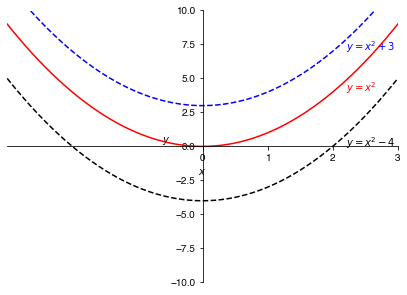

In [4]:
from matplotlib.patches import Polygon

x = numpy.linspace(-3, 3, 300)

# plt.xkcd()
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(7,5))

axis.set_xlim([-3,3])
axis.set_xticks(numpy.arange(0,4))
axis.set_xlabel('$x$')
axis.set_ylim([-10,10])
axis.set_ylabel('$y$',rotation=0)
axis.spines['left'].set_position('zero')
axis.spines['right'].set_color('none')
axis.spines['bottom'].set_position('zero')
axis.spines['top'].set_color('none')

y = x**2
axis.annotate('$y=x^2$',xy=(2.2,4),c='r',ha='left')
axis.plot(x, y,'r-')

y = (x**2)+3
axis.annotate('$y=x^2+3$',xy=(2.2,7),c='b',ha='left')
axis.plot(x, y,'b--')

y = (x**2)-4
axis.annotate('$y=x^2-4$',xy=(2.2,0),c='k',ha='left')
axis.plot(x, y,'k--')


plt.show()

code_toggle()

Notice that the integral sign above has NO LIMITS. We can think of this as calculating the "area function" for a curve (like differentiation is finding out the "gradient function"). The difference being an area is defined by where it starts and where it ends, whereas a gradient is defined at a single point. 

A function with no limits  is called an INDEFINITE INTEGRAL and you **always** need a constant of integration. A $c$ or $k$ is often used, but you can use any letter you want to denote the constant, as long as it isn't confusing.

<div class="alert alert-block alert-danger">
<img src="images/curtis.jpg" width=50 title="Python Logo" style="vertical-align:top"/>
<b>Common misconception:</b> Forgetting the constant of integration when doing an indefinite integral is one of the most common mistakes in calculus.
</div>


### Definite integrals

If there are limits, then it is called a DEFINITE INTEGRAL and when you impose the limits the constant $k$ is eliminated:

\begin{align*}
\int^b_a 2s.dx &= \left [ x^2 +k \right ]_a^b\\
&= (b^2 + k) - (a^2 +k)\\
&= b^2 - a^2 +k -k\\
&= b^2 - a^2
\end{align*}

This cancellation always happens which is why earlier we were lazy and didn't put the $k$ inside the brackets, although we could have done but we would have got the same answer.

## Integrating $\frac{1}{x^n}$

We earlier wrote (this time as an indefinte integral and not including the constant $a$)

$$ \int x^n.dx =  \frac{1}{(n+1)}x^{n+1} + k $$

But what about when $n=-1$? According to the formula.

\begin{align*} 
\int x^{-1}.dx &=  \frac{1}{(-1+1)}x^{-1+1} + k\\
&= \frac{1}{0}x^{0} + k\\
&= \text{RUBBISH!}
\end{align*}


The formula can be shown to hold for all values of $n$ EXCEPT $n=-1$. However we already know the solution to this if we remember that

$\frac{d}{dx} (\ln x) = \frac{1}{x}$

Hence

$$ \boxed{ \int \frac{1}{x}.dx = \ln |x| +k } $$

Why have I written $\ln|x|$ rather than $\ln(x)$, what do the lines mean? These mean take the absolute or modulus of $x$ which simply means you take the non-negative bit of $x$. So $|9|=9$ and $|-9|=9$. We have to do this because the function $1/x$ is defined for positive AND negative values of $x$ but $\ln x$ is only defined for positive values of $x$. You can think of $|x|$ as the DISTANCE from the origin.

Since $k$ is a constant, we can write $k = \ln B$ where $B$ is just another constant whose natural logarithm is $k$. If we do this, we can rewrite the above in a slightly different form using the log laws

\begin{align*}
\int \frac{1}{x}. dx &= \ln |x| + k \\
&= \ln |x| + \ln B\\
&= \ln |Bx|
\end{align*}

## Summary of integration formulae (encountered so far...)

\begin{align*}
\int a.dx &= ax + c\\
\int ax.dx &= \frac{1}{2}ax^2 + c\\
\int ax^n.dx &= \frac{a}{(n+1)}x^{n+1} + c \quad\text{for all }n\text{ except }n=-1\\
\int ax^{-1}.dx &= a \ln |x| + c \\
\end{align*}


## The integral operator

The differential operator is $\frac{d}{dx}$ and if you remember CANNOT be divided or separated. The integral operator, $\int ... dx$, is potentially more confusing since it comes in two bits which 'surround' the function being integrated. Either of them on their own makes no sense WHATSOEVER. 

<div class="alert alert-block alert-danger">
<img src="images/curtis.jpg" width=50 title="Python Logo" style="vertical-align:top"/>
<b>Common misconception:</b> Just like the differential operator ($d/dx$), the integral operator $\int...dx$ signifies a mathematical operation being applied to a function and it CANNOT be divided by/multiplied away. We will return to this later!
</div>

As integration is the mathematical inverse of differentiation, if you want to undo integration, you differentiate, and if you want to undo differentiation, you integrate.

\begin{align*}
\frac{d}{dx} \left [ \int f(x).dx \right ] &= f(x) \\
\int  \left [ \frac{d}{dx}f(x) \right ].dx &= f(x) +c  \\
\end{align*}

Don't forget the integration constant!

## How might integration be useful?

We've seen how $f'(t)$ gives us the RATE at which $f(t)$ changes with time, $t$. Integrating $f'(t)$ with respect to $t$ between $t=a$ and $t=b$ gives us the NET CHANGE undergone by $f(t)$ as $t$ progresses from $a$ to $b$. 

Consider some process characterised by $Q$ which is a measure of how much of something there is (like mass or number of moles). Then if $Q$ has been subject to some change (like it has been reacting) and that change is NOT CONSTANT i.e. it varies with time so we need to know $Q'(t)$, then the amount of $Q$ that has been used up / produced is given by

$$ Q(b) - Q(a) = \int^b_a Q'(t).dt $$

You've already done this without realising it because the simplifying case is when $Q'(t)$ is a constant which will shall call $K$, then this reduces to

$$ \Delta Q = K.\Delta t $$

where $\Delta Q$ and $\Delta t$ mean "change in $Q$ (or $t$)".

For example, you may have done questions involving things travelling at **constant velocity** and then asked to find out how far they have travelled after some time. You can only do this because the velocity was constant and doesn't change with time. Or you may have seen

$$\text{work done} = \text{Force} \times \text{distance moved}$$

That is true iff the force is constant, if it varies with the distance then we need to do this *integral*

$$\text{work done} = \int_{s_0}^{s_1} F(s).ds$$

Generally, being able to measure how the amount of something is changing and then model it mathematically is KEY to biochemistry and the study of reactions. 

## An example application

Let's assume we know that the rate of production of NaCl can be described by $3\sqrt{t}$ g/min where $t$ is measurement in min. Let's identify $Q(t)$ as the mass of NaCl at time $t$ (and we'd expect it to get larger as NaCl is being produced, not consumed).

First, what is the rate of production after 1 min?

\begin{align*}
\text{rate} & =Q'(t)\\
            &=3\sqrt{t}\\
            &=3\sqrt{1}\\
            &= 3 \text{ g/min}
\end{align*}

Then, what is the quantity of NaCl produced over the following three minutes? Since the rate changes with time we have to *integrate* as follows:


\begin{align*}
Q(t=1) - Q(t=4) &= \int^4_1 Q'(t).dt \\
&= 3\sqrt{t}.dt\\
&= \int^4_1 3t^{1/2}.dt\\
&= \left [ 3 \times \frac{1}{3/2} t^{3/2} \right ]^4_1 \quad\text{remember we can check this by differentiating..}\\
&= \left [ 2t^{3/2} \right ]_1^4\\
&= 2 \times 4^{3/2} -2\\
&= 16-2\\
&= 14 \text{ g}
\end{align*}




## How can we integrate a function of a function?

How can we integrate?

$$ \int^b_a (3-4x)^{-5}.dx $$

Just like in differentiation we recognise that the integrand (the function being integrated) is a *function of a function* i.e. can be rewritten as 

$$ \int^b_a f(g(x)).dx $$

The method used to integrate functions like this is called **Integration by substitution**.

## Integration by substitution

$$ I = \int f(g(x)).dx $$

since integration is the mathematical inverse of differentiation, if we differentiate both sides w.r.t. x, we get

$$\frac{dI}{dx} = f(g(x))$$

let $u=g(x)$, then 

$$\frac{dI}{dx} = f(u)$$

but we can express the LHS using the *chain rule* which here is

$$\frac{dI}{dx} = \frac{dI}{du}.\frac{du}{dx}$$

rearranging

$$\frac{dI}{du} = \frac{dI}{dx}.\frac{dx}{du}$$

now integrate both sides w.r.t. $u$

\begin{align*}
\int \frac{dI}{du}.du &= \int \frac{dI}{dx}.\frac{dx}{du}.du \\
I &= \int f(u).\frac{dx}{du}.du \quad\text{where we've made use of the result above}\\
\end{align*}

Hence our final result is if 

$$ I = \int f(g(x)).dx $$

we can make the *substitution* $u=g(x)$ and rewrite this as 

$$\boxed{I = \int f(u).\frac{dx}{dx}.du}$$

As always, it isn't immediately obvious how this helps us (and sometimes, as we shall see, it doesn't!). So, let's do an example

### Example 1

$$\int^b_a (2x+3)^4.dx$$

We could of course expand out the bracket and integrate each of the polynomial terms separately but that would be tedious! Instead let's try a *substitution* and try using our new result. Let $u = 2x+3$. To apply the result, we also need to know $\frac{dx}{du}$.

\begin{align*}
u &= 2x+3\\
\frac{du}{dx} &= 2\\
\frac{dx}{du} &= \frac{1}{2}
\end{align*}

Now we've got everything we need. One important point is since we are substutiting for $x$ using $u=2x+3$ that means we have to change the LIMITS as well. Here we'll use notation to point that out and convert back to $x$ at the end. 

\begin{align*}
I &= \int^b_a (2x+3)^4.dx\\
&= \int_{u(a)}^{u(b)} u^4.\frac{1}{2}.du\\
&= \frac{1}{2}\int_{u(a)}^{u(b)} u^4.du\\
&= \frac{1}{2}\left [ \frac{1}{5}u^5 \right ] _{u(a)}^{u(b)}\\
&= \frac{1}{2}\left [ \frac{1}{5}(2x+3)^5 \right ] _a^b\\
&= \frac{1}{10}\left [(2x+3)^5 \right ] _a^b\\
\end{align*}


We don't need a *constant of integration* since this is a *definite integral*. As ever, we can CHECK it by differentiating our answer. To do that we need to apply the *chain rule*.

$$ y = \frac{1}{10}(2x+5)^5 $$

The chain rule tells us that 

$$\frac{dy}{dx} = \frac{dy}{du}.\frac{du}{dx}$$

Hence

\begin{align*}
u &= 2x+3 \quad & \frac{du}{dx} &= 2\\
y &= \frac{1}{10}u^5 \quad & \frac{dy}{du} &= \frac{1}{2}u^4\\
\end{align*}



Got everything we need for the chain rule:

\begin{align*}
\frac{dy}{dx} &= \frac{dy}{du}.\frac{du}{dx}\\
&= \frac{1}{2}u^4.2\\
&= u^4\\
&= (2x+3)^4
\end{align*}

Which is what we started with! Hence our integration must be correct.

### Example 2

Consider

$$\int^b_a (3-4x)^{-5}.dx$$

Let 

\begin{align*}
u &= 3-4x\\
\frac{du}{dx} &= -4\\
\frac{dx}{du} &= -\frac{1}{4}\\
\end{align*}

Now we can use *integration by substitution*

\begin{align*}
I &= \int f(g(x)).dx\\
&= \int f(u).\frac{dx}{dx}.du
\end{align*}


\begin{align*}
\int^b_a (3-4x)^{-5}.dx &= \int_{u(a)}^{u(b)} u^{-5}\times-\frac{1}{4}.du\\
&= -\frac{1}{4}\int_{u(a)}^{u(b)} u^{-5}.du\\
&= \frac{1}{4} \left [ \frac{1}{4}u^{-4}\right ]^{u(b)}_{u(a)}\\
&= \frac{1}{16} \left [ (3-4x)^{-4}\right ]_a^b\\
\end{align*}

### Example 3

What about?

$$\int^b_a x^2(6x^3+4)^{-1/2}.dx$$

This looks horrible, but notice that that the derivative of $x^3$ 'involves' $x^2$. Whenever you see this pattern it is usually a clue that *integration by substitution* is likely to work.

\begin{align*}
u &= 6x^3+4\\
\frac{du}{dx} &= 18x^2\\
\frac{dx}{du} &= \frac{1}{18x^2}\\
\end{align*}

Now let's integrate

\begin{align*}
\int^b_a x^2(6x^3+4)^{-1/2}.dx &= \int^{u(b)}_{u(a)} x^2u^{-1/2}.\frac{1}{18x^2}.du\\
&= \int^{u(b)}_{u(a)} \frac{1}{18}.u^{-1/2}.du\\
&= \frac{1}{18} \int^{u(b)}_{u(a)} u^{-1/2}.du\\
&= \frac{1}{18} .\left [ 2u^{1/2} \right ]^{u(b)}_{u(a)}\\
&= \frac{1}{9} \left [ u^{1/2} \right ]^b_a\\
&= \frac{1}{9} \left [ (6x^3+4)^{1/2} \right ]^b_a\\
\end{align*}

I'll leave it to you to check it by applying the chain rule to differentiate it...

<div class="alert alert-block alert-info">
<img src="images/tick.png" width=50 title="Tip" style="vertical-align:top"/>
<b>Tip:</b> if you have a complex integral but part of it looks like a constant times the differential of the other part, then integration by substitution is likely to work.
</div>